<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading MNIST Dataset
----------------------------------

In [5]:
# something is not working with new version of sympy package so I install previous version
!pip uninstall -y sympy
!pip install sympy==1.12 --quiet

Found existing installation: sympy 1.13.1
Uninstalling sympy-1.13.1:
  Successfully uninstalled sympy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 113.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system

In [1]:
import torch
import torchvision
from matplotlib import pyplot

transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)   #we do shuffle it to give more randomizations to training epochs

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.29MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = torch.nn.ReLU()
        self.conv1 = torch.nn.Conv2d(kernel_size = 5, in_channels = 1, out_channels = 6)
        self.conv2 = torch.nn.Conv2d(kernel_size = 5, in_channels = 6, out_channels = 16)
        self.conv3 = torch.nn.Conv2d(kernel_size = 4, in_channels = 16, out_channels = 120)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride=2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(120, 84)
        self.linear2 = torch.nn.Linear(84, 10)

        # TODO: add missing layers

        self.dropout = torch.nn.Dropout(0.05)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = x.squeeze(-1).squeeze(-1)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)

        # TODO: add missing processing

        x = self.dropout(x)
        return x

# Training Loop
----------------------

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = LeNet5().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)   #initial and fixed learning rate of 0.001.

net.train()    #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing traning
for epoch in range(16):  #  an epoch is a training run through the whole data set

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)  #explicitly moving the data to the target device
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)   #this line calls the forward(self, x) method of the LeNet5 object. Please note,
                                            # the nonlinear activation after the last layer is NOT applied
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") #instead, nonlinear softmax is applied internally in THIS loss function
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()       #this computes gradients as we have seen in previous workshops
        optimizer.step()     #but this line in fact updates our neural network.
                                ####You can experiment - comment this line and check, that the loss DOE

Working on cuda
epoch: 0 batch: 0 current batch loss: 2.300748109817505
epoch: 0 batch: 1 current batch loss: 2.2944273948669434
epoch: 0 batch: 2 current batch loss: 2.2848339080810547
epoch: 0 batch: 3 current batch loss: 2.2750320434570312
epoch: 0 batch: 4 current batch loss: 2.265981912612915
epoch: 0 batch: 5 current batch loss: 2.2491562366485596
epoch: 0 batch: 6 current batch loss: 2.234757900238037
epoch: 0 batch: 7 current batch loss: 2.211500406265259
epoch: 0 batch: 8 current batch loss: 2.191216468811035
epoch: 0 batch: 9 current batch loss: 2.1595606803894043
epoch: 0 batch: 10 current batch loss: 2.1275954246520996
epoch: 0 batch: 11 current batch loss: 2.0924577713012695
epoch: 0 batch: 12 current batch loss: 2.047736883163452
epoch: 0 batch: 13 current batch loss: 1.985296368598938
epoch: 0 batch: 14 current batch loss: 1.9290918111801147
epoch: 0 batch: 15 current batch loss: 1.8569834232330322
epoch: 0 batch: 16 current batch loss: 1.8060028553009033
epoch: 0 batch:

# Testing
----------------------

In [ ]:
good = 0
wrong = 0

net.eval()              #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing evaluation
with torch.no_grad():   #it prevents that the net learns during evalution. The gradients are not computed, so this makes it faster, too
    for batch, data in enumerate(testloader): #batches in test are of size 1
        datapoint, label = data

        prediction = net(datapoint.to(device))                  #prediction has values representing the "prevalence" of the corresponding class
        classification = torch.argmax(prediction)    #the class is the index of maximal "prevalence"

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good/(good+wrong))

accuracy =  0.9798


# **Homework Assignment – Adversarial Examples**

In this assignment, you will explore how small (invisible to humans) changes to real digits can _fool_ the CNN into misclassifying them, even though the changes are imperceptible to humans.



## Task 1 – CNN Dreams: Last Homework Assignment Revisited

Re-run the input optimization process (for NN dreams) from the previous MLP-class homework assignment, but this time using the **LeNet-5 CNN model** we trained in this class.


1. Starting from ten random noise images, optimize the input so that each image is classified with high confidence as one of the digits 0 through 9.
2. Include an **L2 penalty** on the input to keep the images visually closer to realistic digits. Use a range of penalty strengths (e.g., $\lambda_{l2}$ = 0, and then 0.01 through 10.0).
3. Compare the generated images (with and without L2 penalty) to those generated by the MLP:
   - Are they more or less readable?
   - Do they resemble real MNIST digits more closely or less?
   - Why do you think that happens? Consider the CNN’s inductive biases and architectural properties.

Use `cross_entropy_loss + lambda_l2 * input.pow(2).mean()` as your objective.

Reuse your code: visualize confidence evolution during optimization and generate image grids and (optionally) animations showing how the inputs evolve.


## Task 2 – Adversarial Examples: Fooling LeNet-5

This is the core focus of the assignment.

Using a batch of **real MNIST digits** (e.g., nine examples per class), craft **adversarial examples** by adding subtle, trained noise to the input images. Your goal is to:

- **Keep the human-perceived digit the same** (e.g., a "7" should still look like a "7"),
- But **cause LeNet-5 to misclassify it** – as every other class different from the original, hence nine examples per class.

### Objective
For each image $x$ and its true label $y$, learn a perturbation $\delta$ such that:

- $\text{LeNet5}(x + \delta) = y_{\text{wrong}} $,
- and $ \|\delta\|_2 $ is as small as possible (penalize large perturbations), to keep $x + \delta$ *look* like $x$ for humans.

### Optimization
Use gradient-based optimization on $\delta$ (the noise), while keeping the network weights frozen. Your loss might look like:

```
loss = cross_entropy(model(x + delta), target_wrong_class) +
       lambda_l2 * delta.pow(2).mean()
```

Tune the $\lambda_{l2}$ to find the best range.

### Deliverables for the Second Task
- Select some best examples, showing the original digit and its (correct) classification and the perturbed digit (hopefully, still looking the same to humans) and how it gets misclassified. Show them side by side.
- Report:
  - Success rate of attacks (it doesn't need to be very formal),
  - Effect of $\lambda_{l2}$ on visibility of the noise and success of misclassification,
  - Example image grids and confidence plots.



## Deliverables for the Homework Assignment
- A Google Colab notebook with:
  - Complete implementation for both tasks.
  - Visualizations and animations (animations are optional but encouraged).
  - Clear written analysis of your findings.
- Upload the notebook and results to your GitHub repository for the course.
- Include a link to the notebook and video (if applicable) in the `README.md`.
- In the notebook, include “Open in Colab” badge so it can be launched directly.

Step 0, Loss: 5.1692, Confidence: [0.006, 0.001, 0.008, 0.051, 0.0, 0.121, 0.001, 0.003, 0.521, 0.001]
Step 50, Loss: 0.0315, Confidence: [0.964, 0.962, 0.994, 0.98, 0.965, 0.992, 0.966, 0.98, 0.986, 0.904]
Step 100, Loss: 0.0121, Confidence: [0.982, 0.984, 0.996, 0.989, 0.989, 0.995, 0.983, 0.993, 0.993, 0.976]
Step 150, Loss: 0.0080, Confidence: [0.987, 0.99, 0.997, 0.993, 0.992, 0.996, 0.988, 0.995, 0.996, 0.986]
Step 200, Loss: 0.0058, Confidence: [0.991, 0.993, 0.998, 0.995, 0.994, 0.997, 0.991, 0.997, 0.997, 0.99]
Step 250, Loss: 0.0045, Confidence: [0.993, 0.995, 0.998, 0.996, 0.996, 0.998, 0.993, 0.997, 0.998, 0.993]
Step 300, Loss: 0.0036, Confidence: [0.994, 0.996, 0.998, 0.997, 0.996, 0.998, 0.994, 0.998, 0.998, 0.994]
Step 350, Loss: 0.0030, Confidence: [0.995, 0.997, 0.999, 0.997, 0.997, 0.998, 0.995, 0.998, 0.998, 0.995]
Step 400, Loss: 0.0025, Confidence: [0.996, 0.997, 0.999, 0.998, 0.997, 0.999, 0.996, 0.999, 0.999, 0.996]
Step 450, Loss: 0.0022, Confidence: [0.996, 0.

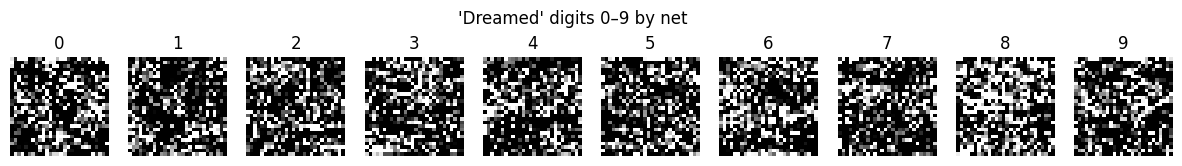

In [ ]:
### TASK 1.1

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# setting up network
net.eval()

# gaussian noise as input
dreamed_inputs = torch.randn((10, 1, 28, 28), device=device, requires_grad=True)

# setting target classes for images: i-th image -> i-th number
target_classes = torch.arange(10, device=device)

# optimizer for input
optimizer = torch.optim.Adam([dreamed_inputs], lr=0.01)

# "dreaming" procedure; optimizing random gaussian input images
for step in range(3000):

    # freezing weights of the net
    optimizer.zero_grad()

    # defining loss function and optimizing
    logits = net(dreamed_inputs)
    loss = F.cross_entropy(logits, target_classes)
    loss.backward()
    optimizer.step()

    # displaying values of loss function and probabilities that i-th image is i-th digit
    if step % 50 == 0 or step == 2999:
        with torch.no_grad():
            probs = F.softmax(logits, dim=1)
            max_probs = probs.gather(1, target_classes.view(-1,1))
            print(f"Step {step}, Loss: {loss.item():.4f}, Confidence: {[round(p.item(), 3) for p in max_probs]}")

# preparing for vizualization
dreamed_images_vis = dreamed_inputs.detach().cpu().clone()
dreamed_images_vis = dreamed_images_vis.clamp(0, 1)

# vizualization of "dreamed" digits by the net
fig, axs = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axs[i].imshow(dreamed_images_vis[i][0], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(i))
plt.suptitle("'Dreamed' digits 0–9 by net")
plt.show()


λ=0.001, Step 0, Loss: 4.5848, P(class): [0.0, 0.0, 0.148, 0.217, 0.0, 0.038, 0.024, 0.011, 0.281, 0.01]
λ=0.001, Step 500, Loss: 0.0028, P(class): [0.997, 0.998, 0.999, 0.999, 0.999, 0.999, 0.997, 0.999, 0.999, 0.998]
λ=0.001, Step 1000, Loss: 0.0017, P(class): [0.999, 0.999, 1.0, 1.0, 0.999, 1.0, 0.999, 1.0, 1.0, 0.999]
λ=0.001, Step 1500, Loss: 0.0014, P(class): [0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0]
λ=0.001, Step 2000, Loss: 0.0013, P(class): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
λ=0.001, Step 2500, Loss: 0.0011, P(class): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
λ=0.001, Step 2999, Loss: 0.0011, P(class): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
λ=0.010, Step 0, Loss: 4.5938, P(class): [0.0, 0.0, 0.148, 0.217, 0.0, 0.038, 0.024, 0.011, 0.281, 0.01]
λ=0.010, Step 500, Loss: 0.0115, P(class): [0.997, 0.997, 0.999, 0.999, 0.999, 0.999, 0.997, 0.999, 0.999, 0.997]
λ=0.010, Step 1000, Loss: 0.0091, P(class): [0.998, 0.999, 1.0, 1.0, 0.99

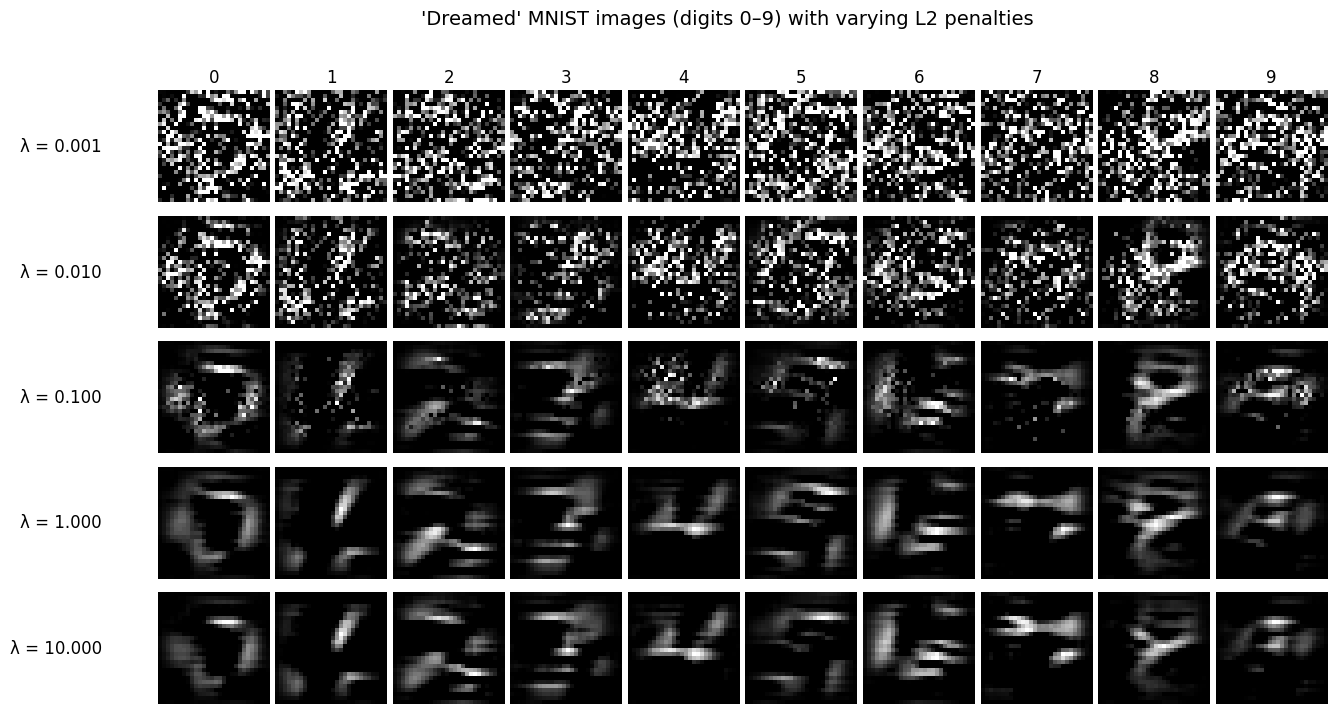

In [ ]:
### TASK 1.2

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


# generating 10 random gaussian noise iamges
base_inputs = torch.randn((10, 1, 28, 28), device=device, requires_grad=True)

# setting target classes for images: i-th image -> i-th number
target_classes = torch.arange(10, device=device)

# preparing set of lambda values
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# preparing for further vizualization
fig, axs = plt.subplots(len(lambda_values), 10, figsize=(15, 8))
if len(lambda_values) == 1:
    axs = axs.unsqueeze(0)

# "dreaming" procedure for every lambda
for i, lambda_l2 in enumerate(lambda_values):

    # getting input images
    dreamed_inputs = base_inputs.clone().detach().requires_grad_(True)

    # preparing optimizer
    optimizer = torch.optim.Adam([dreamed_inputs], lr=0.01)

    # optimizing procedure (almost the same as in Problem 1)
    for step in range(3000):
        optimizer.zero_grad()
        logits = net(dreamed_inputs)
        probs = F.softmax(logits, dim=1)
        target_loss = F.cross_entropy(logits, target_classes)

        # introducing L2 penalty to loss function
        l2_penalty = lambda_l2 * dreamed_inputs.pow(2).mean()
        loss = target_loss + l2_penalty

        loss.backward()
        optimizer.step()

        # displaying values of loss function and probabilities of "correct" classification
        if step % 500 == 0 or step == 2999:
            prob_class = probs.gather(1, target_classes.view(-1, 1))
            print(f"λ={lambda_l2:.3f}, Step {step}, Loss: {loss.item():.4f}, P(class): {[round(p.item(), 3) for p in prob_class]}")

    # Vizualization section
    images = dreamed_inputs.detach().cpu().clamp(0, 1)

    for j in range(10):
        ax = axs[i, j]
        ax.imshow(images[j, 0], cmap='gray')
        ax.axis('off')

        # labeling each row with lambda
        if j == 0:
            ax.annotate(f"λ = {lambda_l2:.3f}", xy=(0, 0.5), xycoords='axes fraction',
                        fontsize=12, ha='right', va='center', rotation=0,
                        xytext=(-40, 0), textcoords='offset points')
        if i ==0:
            ax.set_title(str(j), fontsize=12)

# Vizualization section 2
plt.suptitle("'Dreamed' MNIST images (digits 0–9) with varying L2 penalties", fontsize=14)
plt.subplots_adjust(top=0.88, left=0.12, wspace=0.05, hspace=0.1)
plt.show()


**TASK 1**

**Compare the generated images (with and without L2 penalty) to those generated by the MLP:**
   - **Are they more or less readable?**

Cyfry wygenerowane powyżej wydają się być bardziej czytelne w porównaniu do poprzedniej pracy domowej. Dla przypadków bez *L2 penalty* i dla niskich wartości kary ($\lambda = 0,\ \lambda = 0.001,\ \lambda = 0.01$) na obrazkach występuje dalej bardzo dużo szumu, przez co ich czytelność stoi na niskim poziomie. Jednak, zarysy cyfr są o wiele lepiej widoczne dla tych przypadków niż w poprzedniej pracy domowej.

Dla wyższych wartości kary ($\lambda = 0.1,\ λ = 1,\ \lambda = 10$) również występuje o wiele mniej szumu, co poprawia czytelność - szum prawie nie występuje i, w szczególności dla $\lambda >= 1$, zauważamy na obrazkach prawie tylko białe pasma na czarnym tle.

   - **Do they resemble real MNIST digits more closely or less?**

Obrazy przypominają rzeczywiste cyfry z zbioru MNIST bardziej niż w poprzedniej pracy domowej. Dzieje się tak między innymi dzięki poprawionej czytelności, co opisano wyżej. Dla $\lambda >= 0.1$ całkiem spora część cyfr przypomina już te cyfry, które powinny i bylibyśmy dopasować je do odpowiedniej klasy nie widząc wcześniej do jakiej klasy należą. Niemniej jednak, niektóre obrazki dalej nie przypominają rzeczywistych liczb: (0, 3, 4, 5, 8 mocniej przypominają rzeczywiste cyfry, natomiast pozostałe niezbyt).

   - **Why do you think that happens? Consider the CNN’s inductive biases and architectural properties.**

Dzieje się tak, gdyż CNN jest zdefiniowana taki sposób, że prowadzi to do lepszej czytelności i zwiększonej szansy na generowanie obrazów możliwych do rozpoznania przez człowieka. CNN posiada warstwy konwolucyjne i warstwy *poolingowe* dzięki którym model lepiej "rozumie", że sąsiednie piksele mają znaczenie, przez co jeszcze lepiej rozumie, iż wzorce konkretnych liczb. Widać to w naszym badaniu - cyfry są o wiele czytelniejsze i występuje mniej szumu.




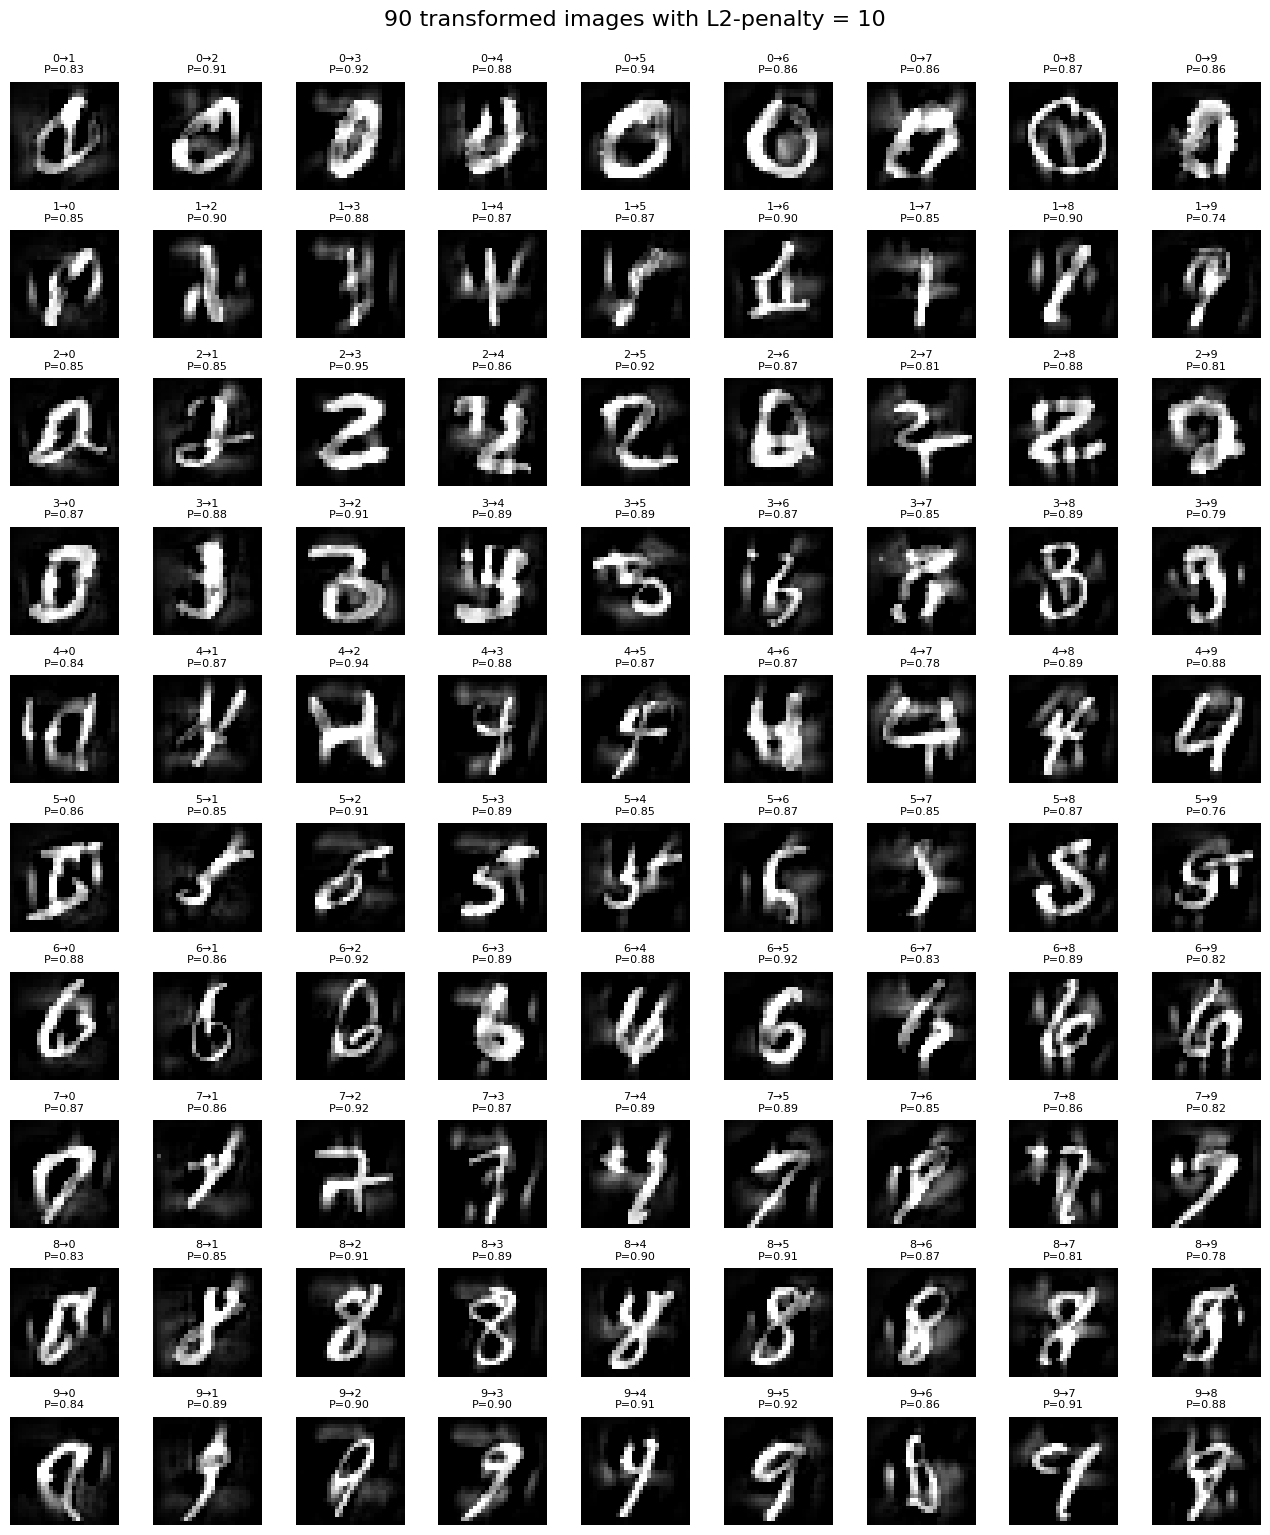

In [ ]:
### TASK 2

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# defining function that will export 9 images from each class
def get_nine_per_class(device='cuda'):

    # preparing dataset
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    images = {i: [] for i in range(10)}

    # loop that collects 9 distinct images for every class
    for img, label in dataset:
        if len(images[label]) < 9:
            images[label].append(img)
        if all(len(v) == 9 for v in images.values()):
            break

    all_imgs, all_labels = [], []

    # gathers all images in one list (all_imgs) and all labels (all_labels)
    for label in range(10):
        all_imgs.extend(images[label])
        all_labels.extend([label] * 9)

    return torch.stack(all_imgs).to(device), torch.tensor(all_labels, device=device)

# defining function that will generate new target labels
# we will use this function to set target labels in process of adding noise that will fool neural network
def generate_target_labels(true_labels):
    target_labels = []

    # loop that generates target classes for transformed images
    for label in true_labels[::9]:
        # other than true class
        others = [i for i in range(10) if i != label.item()]
        target_labels.extend(others)
    return torch.tensor(target_labels, device=true_labels.device)

# defining function for training images that will fool neural net
def generate_adversarials_one_to_each(net, images, true_labels, target_labels, lambda_l2=0.01, steps=1000, device='cuda'):
    # setting neural net
    net.eval()

    # list for adversial images
    adversarials = []

    # list for probabilities (of classification one image as target class)
    probs = []

    # loop for every image
    for idx in range(len(images)):

        # setting image for further transformation
        orig = images[idx:idx+1]

        # setting target label
        target = target_labels[idx].item()

        # random noise that will be trained to fool neural net
        delta = torch.zeros_like(orig, requires_grad=True)

        # setting optimizer for further training
        optimizer = torch.optim.Adam([delta], lr=0.01)

        # training loop
        for step in range(steps):
            # freezing weights
            optimizer.zero_grad()

            # setting up loss function with delta
            perturbed = (orig + delta).clamp(0, 1)
            logits = net(perturbed)
            loss = F.cross_entropy(logits, torch.tensor([target], device=device)) + lambda_l2 * delta.pow(2).mean()

            # optimizing
            loss.backward()
            optimizer.step()

        # saving transformed image
        adv_img = (orig + delta).detach().clamp(0, 1)
        adversarials.append(adv_img)

        # calculating probability that transfored image is in target (not true) class
        with torch.no_grad():
            logits = net(adv_img)
            prob = F.softmax(logits, dim=1)[0, target].item()
            probs.append(prob)

    return adversarials, probs

# defining function that will plot results
def plot_adv_grid_90(orig_images, orig_labels, adv_images, target_labels, probs):

    # plotting section
    fig, axs = plt.subplots(10, 9, figsize=(13, 15))
    # showing results for 90 images
    for i in range(10):
        for j in range(9):
            idx = i * 9 + j

            # plotting image
            axs[i, j].imshow(adv_images[idx].cpu().squeeze(), cmap='gray')

            # showing label for every image in form:
            # (original class → new class we achieved by fooling)
            # (probability that transformed image belongs to "untrue" class)
            axs[i, j].set_title(f"{orig_labels[idx].item()}→{target_labels[idx].item()}\nP={probs[idx]:.2f}", fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.suptitle("90 transformed images with L2-penalty = 10", fontsize=16, y=1.02)
    plt.show()

### Using all above functions

# moving calculations to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# setting neural network
net.eval()

# getting 9 images for every class
images, labels = get_nine_per_class(device=device)

# getting taget "untrue" labels
target_labels = generate_target_labels(labels)

# training procedure with high l2 penalty
adversarials, probs = generate_adversarials_one_to_each(net, images, labels, target_labels, lambda_l2=10, steps=1000, device=device)

# plotting results
plot_adv_grid_90(images, labels, adversarials, target_labels, probs)


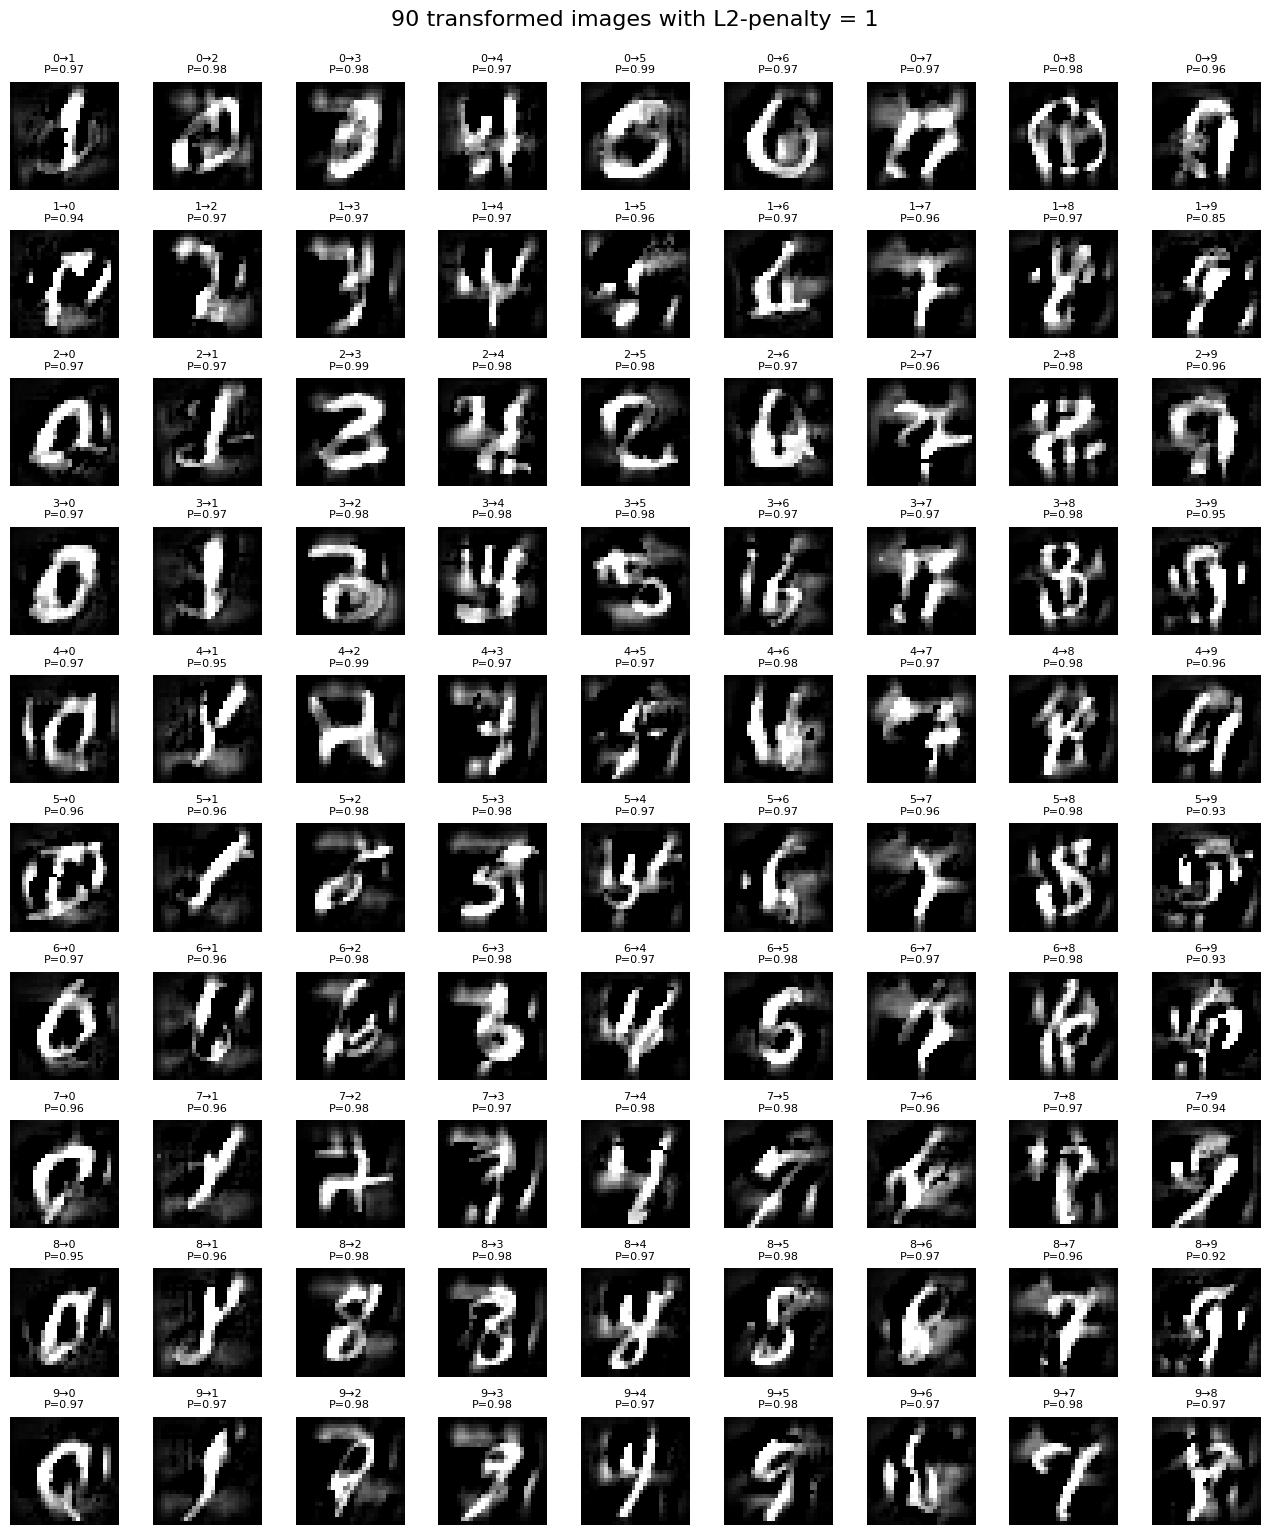

In [ ]:
### TASK 2

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# defining function that will export 9 images from each class
def get_nine_per_class(device='cuda'):

    # preparing dataset
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    images = {i: [] for i in range(10)}

    # loop that collects 9 distinct images for every class
    for img, label in dataset:
        if len(images[label]) < 9:
            images[label].append(img)
        if all(len(v) == 9 for v in images.values()):
            break

    all_imgs, all_labels = [], []

    # gathers all images in one list (all_imgs) and all labels (all_labels)
    for label in range(10):
        all_imgs.extend(images[label])
        all_labels.extend([label] * 9)

    return torch.stack(all_imgs).to(device), torch.tensor(all_labels, device=device)

# defining function that will generate new target labels
# we will use this function to set target labels in process of adding noise that will fool neural network
def generate_target_labels(true_labels):
    target_labels = []

    # loop that generates target classes for transformed images
    for label in true_labels[::9]:
        # other than true class
        others = [i for i in range(10) if i != label.item()]
        target_labels.extend(others)
    return torch.tensor(target_labels, device=true_labels.device)

# defining function for training images that will fool neural net
def generate_adversarials_one_to_each(net, images, true_labels, target_labels, lambda_l2=0.01, steps=1000, device='cuda'):
    # setting neural net
    net.eval()

    # list for adversial images
    adversarials = []

    # list for probabilities (of classification one image as target class)
    probs = []

    # loop for every image
    for idx in range(len(images)):

        # setting image for further transformation
        orig = images[idx:idx+1]

        # setting target label
        target = target_labels[idx].item()

        # random noise that will be trained to fool neural net
        delta = torch.zeros_like(orig, requires_grad=True)

        # setting optimizer for further training
        optimizer = torch.optim.Adam([delta], lr=0.01)

        # training loop
        for step in range(steps):
            # freezing weights
            optimizer.zero_grad()

            # setting up loss function with delta
            perturbed = (orig + delta).clamp(0, 1)
            logits = net(perturbed)
            loss = F.cross_entropy(logits, torch.tensor([target], device=device)) + lambda_l2 * delta.pow(2).mean()

            # optimizing
            loss.backward()
            optimizer.step()

        # saving transformed image
        adv_img = (orig + delta).detach().clamp(0, 1)
        adversarials.append(adv_img)

        # calculating probability that transfored image is in target (not true) class
        with torch.no_grad():
            logits = net(adv_img)
            prob = F.softmax(logits, dim=1)[0, target].item()
            probs.append(prob)

    return adversarials, probs

# defining function that will plot results
def plot_adv_grid_90(orig_images, orig_labels, adv_images, target_labels, probs):

    # plotting section
    fig, axs = plt.subplots(10, 9, figsize=(13, 15))
    # showing results for 90 images
    for i in range(10):
        for j in range(9):
            idx = i * 9 + j

            # plotting image
            axs[i, j].imshow(adv_images[idx].cpu().squeeze(), cmap='gray')

            # showing label for every image in form:
            # (original class → new class we achieved by fooling)
            # (probability that transformed image belongs to "untrue" class)
            axs[i, j].set_title(f"{orig_labels[idx].item()}→{target_labels[idx].item()}\nP={probs[idx]:.2f}", fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.suptitle("90 transformed images with L2-penalty = 1", fontsize=16, y=1.02)
    plt.show()

### Using all above functions

# moving calculations to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# setting neural network
net.eval()

# getting 9 images for every class
images, labels = get_nine_per_class(device=device)

# getting taget "untrue" labels
target_labels = generate_target_labels(labels)

# training procedure with high l2 penalty
adversarials, probs = generate_adversarials_one_to_each(net, images, labels, target_labels, lambda_l2=1, steps=1000, device=device)

# plotting results
plot_adv_grid_90(images, labels, adversarials, target_labels, probs)


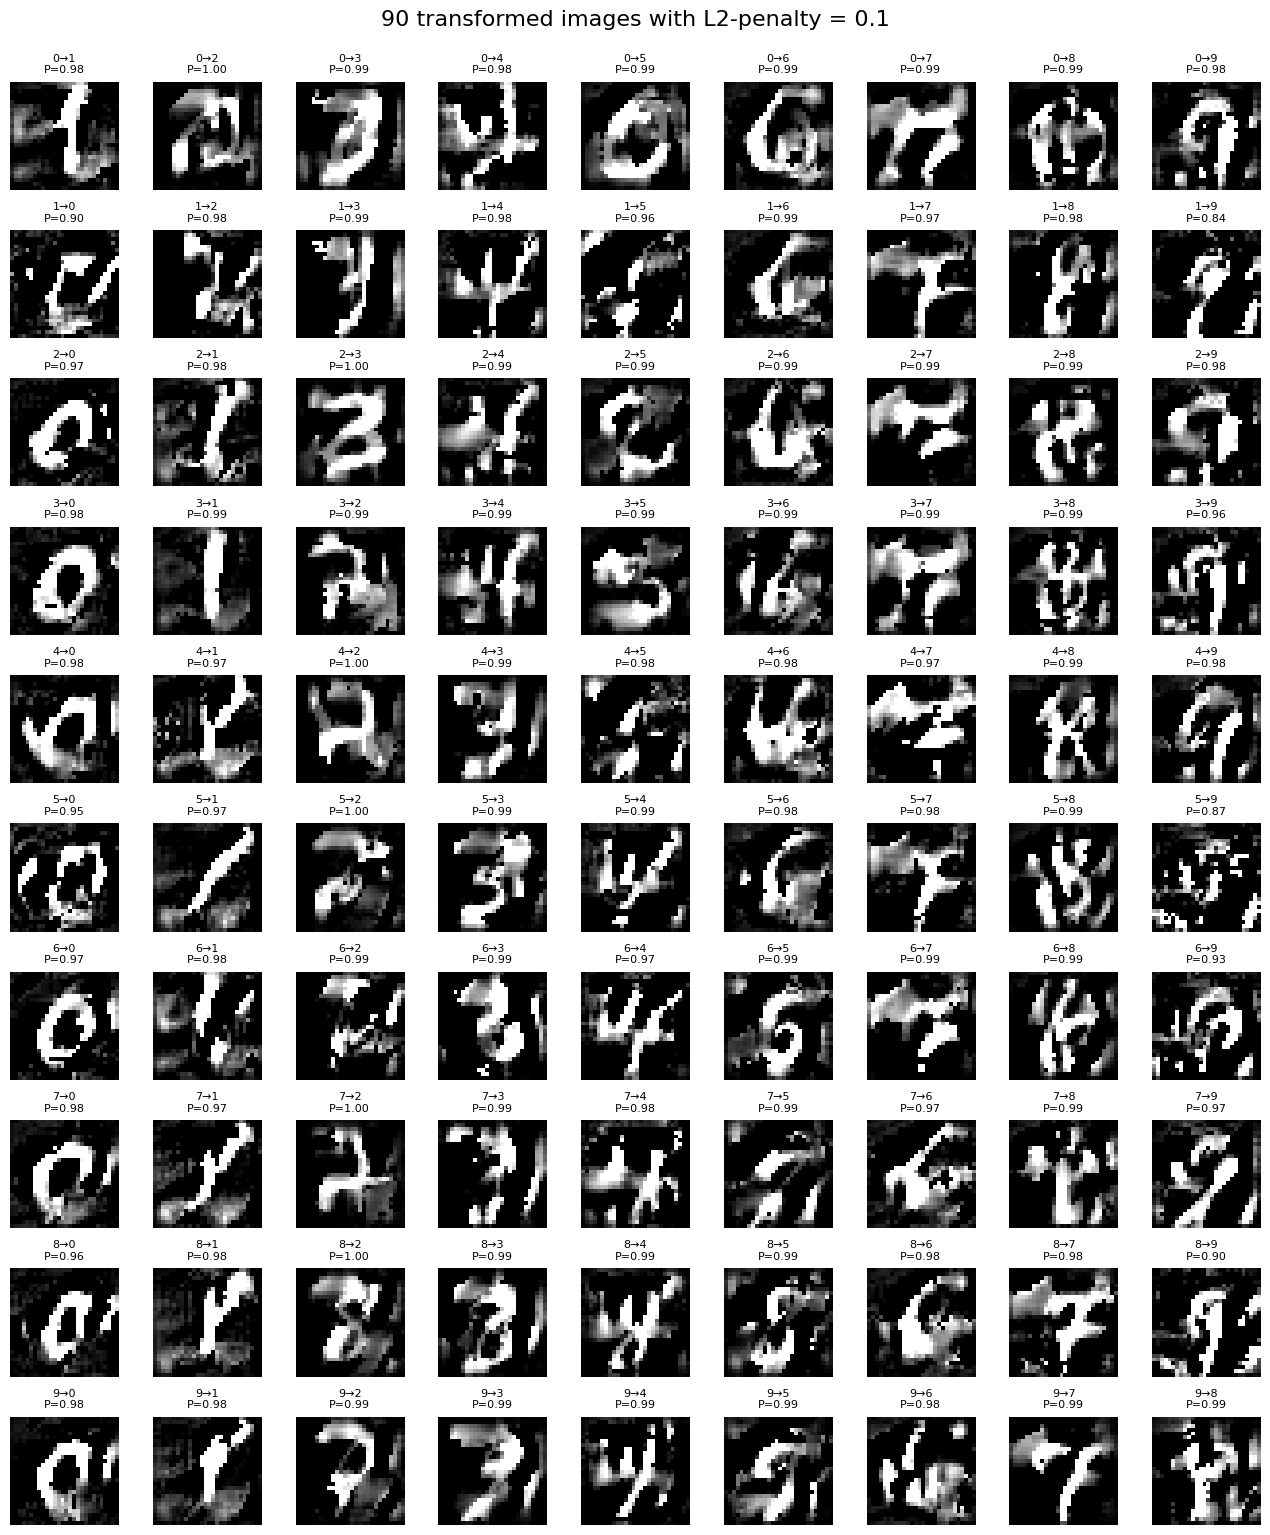

In [ ]:
### TASK 2

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# defining function that will export 9 images from each class
def get_nine_per_class(device='cuda'):

    # preparing dataset
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    images = {i: [] for i in range(10)}

    # loop that collects 9 distinct images for every class
    for img, label in dataset:
        if len(images[label]) < 9:
            images[label].append(img)
        if all(len(v) == 9 for v in images.values()):
            break

    all_imgs, all_labels = [], []

    # gathers all images in one list (all_imgs) and all labels (all_labels)
    for label in range(10):
        all_imgs.extend(images[label])
        all_labels.extend([label] * 9)

    return torch.stack(all_imgs).to(device), torch.tensor(all_labels, device=device)

# defining function that will generate new target labels
# we will use this function to set target labels in process of adding noise that will fool neural network
def generate_target_labels(true_labels):
    target_labels = []

    # loop that generates target classes for transformed images
    for label in true_labels[::9]:
        # other than true class
        others = [i for i in range(10) if i != label.item()]
        target_labels.extend(others)
    return torch.tensor(target_labels, device=true_labels.device)

# defining function for training images that will fool neural net
def generate_adversarials_one_to_each(net, images, true_labels, target_labels, lambda_l2=0.01, steps=1000, device='cuda'):
    # setting neural net
    net.eval()

    # list for adversial images
    adversarials = []

    # list for probabilities (of classification one image as target class)
    probs = []

    # loop for every image
    for idx in range(len(images)):

        # setting image for further transformation
        orig = images[idx:idx+1]

        # setting target label
        target = target_labels[idx].item()

        # random noise that will be trained to fool neural net
        delta = torch.zeros_like(orig, requires_grad=True)

        # setting optimizer for further training
        optimizer = torch.optim.Adam([delta], lr=0.01)

        # training loop
        for step in range(steps):
            # freezing weights
            optimizer.zero_grad()

            # setting up loss function with delta
            perturbed = (orig + delta).clamp(0, 1)
            logits = net(perturbed)
            loss = F.cross_entropy(logits, torch.tensor([target], device=device)) + lambda_l2 * delta.pow(2).mean()

            # optimizing
            loss.backward()
            optimizer.step()

        # saving transformed image
        adv_img = (orig + delta).detach().clamp(0, 1)
        adversarials.append(adv_img)

        # calculating probability that transfored image is in target (not true) class
        with torch.no_grad():
            logits = net(adv_img)
            prob = F.softmax(logits, dim=1)[0, target].item()
            probs.append(prob)

    return adversarials, probs

# defining function that will plot results
def plot_adv_grid_90(orig_images, orig_labels, adv_images, target_labels, probs):

    # plotting section
    fig, axs = plt.subplots(10, 9, figsize=(13, 15))
    # showing results for 90 images
    for i in range(10):
        for j in range(9):
            idx = i * 9 + j

            # plotting image
            axs[i, j].imshow(adv_images[idx].cpu().squeeze(), cmap='gray')

            # showing label for every image in form:
            # (original class → new class we achieved by fooling)
            # (probability that transformed image belongs to "untrue" class)
            axs[i, j].set_title(f"{orig_labels[idx].item()}→{target_labels[idx].item()}\nP={probs[idx]:.2f}", fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.suptitle("90 transformed images with L2-penalty = 0.1", fontsize=16, y=1.02)
    plt.show()

### Using all above functions

# moving calculations to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# setting neural network
net.eval()

# getting 9 images for every class
images, labels = get_nine_per_class(device=device)

# getting taget "untrue" labels
target_labels = generate_target_labels(labels)

# training procedure with high l2 penalty
adversarials, probs = generate_adversarials_one_to_each(net, images, labels, target_labels, lambda_l2=0.1, steps=1000, device=device)

# plotting results
plot_adv_grid_90(images, labels, adversarials, target_labels, probs)


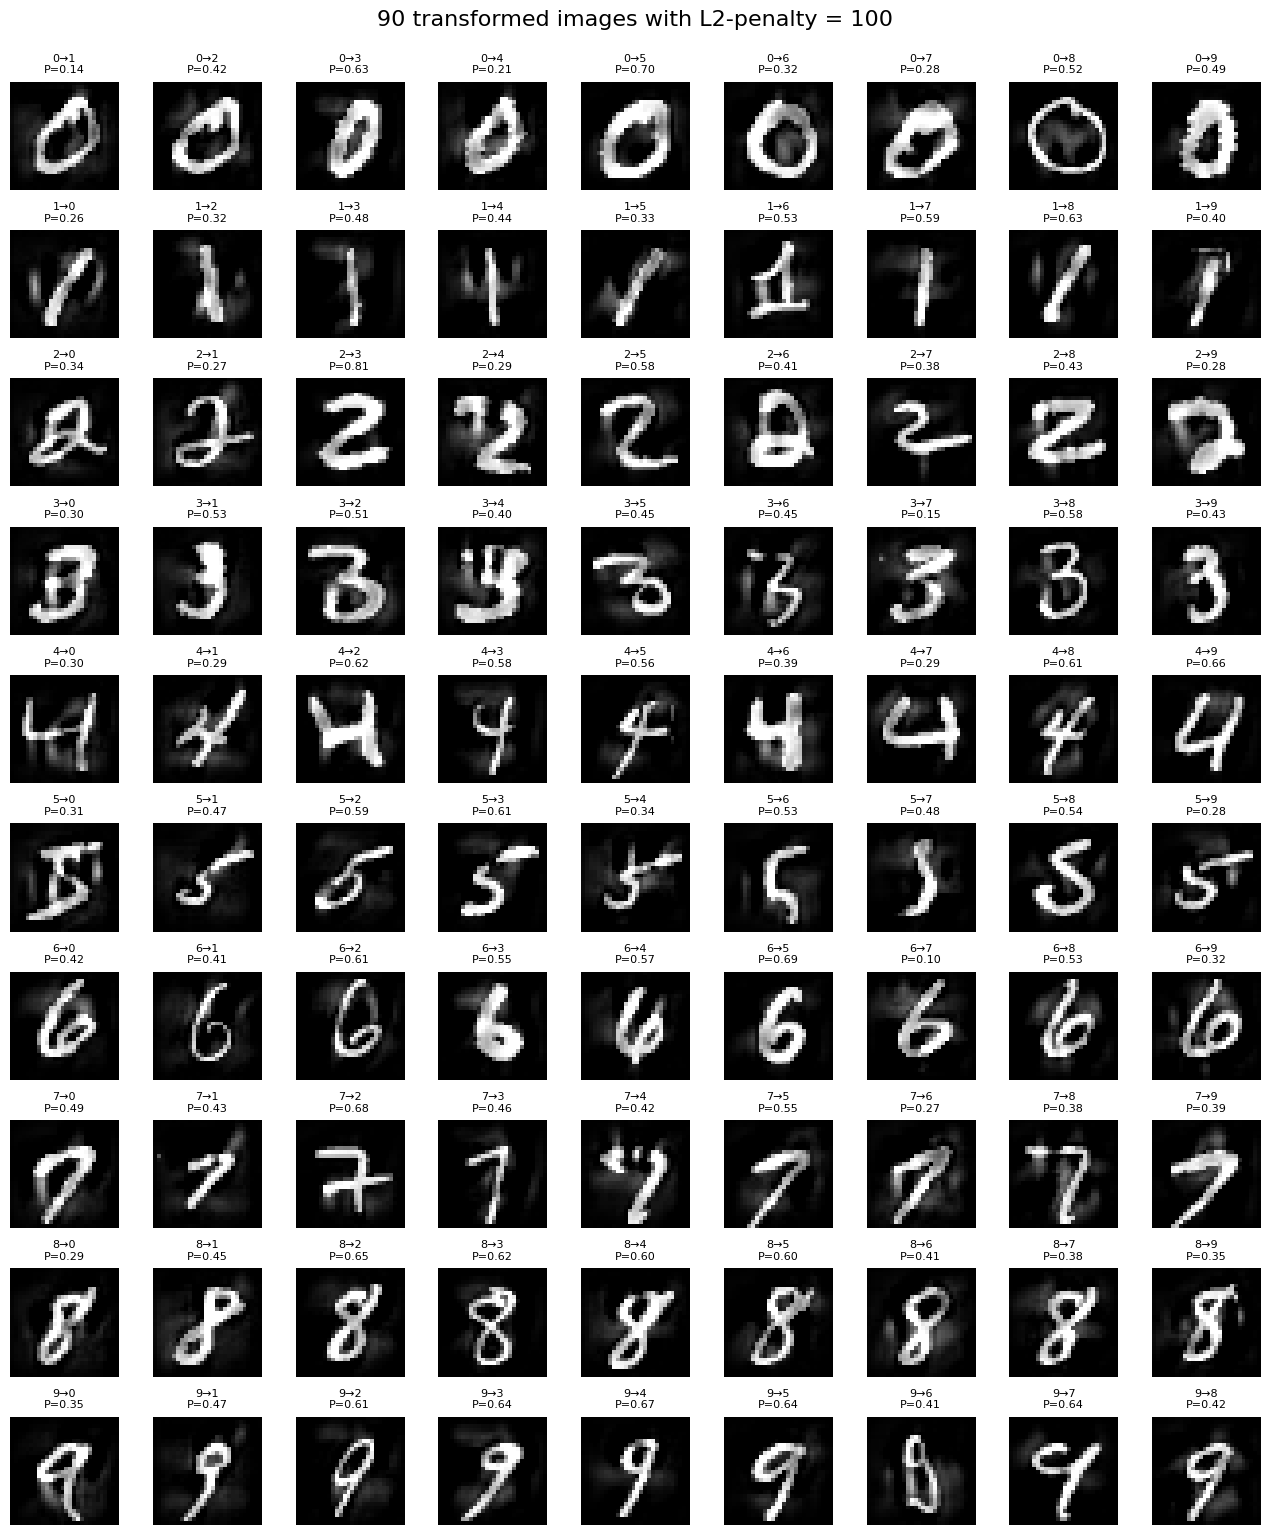

In [ ]:
### TASK 2

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# defining function that will export 9 images from each class
def get_nine_per_class(device='cuda'):

    # preparing dataset
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    images = {i: [] for i in range(10)}

    # loop that collects 9 distinct images for every class
    for img, label in dataset:
        if len(images[label]) < 9:
            images[label].append(img)
        if all(len(v) == 9 for v in images.values()):
            break

    all_imgs, all_labels = [], []

    # gathers all images in one list (all_imgs) and all labels (all_labels)
    for label in range(10):
        all_imgs.extend(images[label])
        all_labels.extend([label] * 9)

    return torch.stack(all_imgs).to(device), torch.tensor(all_labels, device=device)

# defining function that will generate new target labels
# we will use this function to set target labels in process of adding noise that will fool neural network
def generate_target_labels(true_labels):
    target_labels = []

    # loop that generates target classes for transformed images
    for label in true_labels[::9]:
        # other than true class
        others = [i for i in range(10) if i != label.item()]
        target_labels.extend(others)
    return torch.tensor(target_labels, device=true_labels.device)

# defining function for training images that will fool neural net
def generate_adversarials_one_to_each(net, images, true_labels, target_labels, lambda_l2=0.01, steps=1000, device='cuda'):
    # setting neural net
    net.eval()

    # list for adversial images
    adversarials = []

    # list for probabilities (of classification one image as target class)
    probs = []

    # loop for every image
    for idx in range(len(images)):

        # setting image for further transformation
        orig = images[idx:idx+1]

        # setting target label
        target = target_labels[idx].item()

        # random noise that will be trained to fool neural net
        delta = torch.zeros_like(orig, requires_grad=True)

        # setting optimizer for further training
        optimizer = torch.optim.Adam([delta], lr=0.01)

        # training loop
        for step in range(steps):
            # freezing weights
            optimizer.zero_grad()

            # setting up loss function with delta
            perturbed = (orig + delta).clamp(0, 1)
            logits = net(perturbed)
            loss = F.cross_entropy(logits, torch.tensor([target], device=device)) + lambda_l2 * delta.pow(2).mean()

            # optimizing
            loss.backward()
            optimizer.step()

        # saving transformed image
        adv_img = (orig + delta).detach().clamp(0, 1)
        adversarials.append(adv_img)

        # calculating probability that transfored image is in target (not true) class
        with torch.no_grad():
            logits = net(adv_img)
            prob = F.softmax(logits, dim=1)[0, target].item()
            probs.append(prob)

    return adversarials, probs

# defining function that will plot results
def plot_adv_grid_90(orig_images, orig_labels, adv_images, target_labels, probs):

    # plotting section
    fig, axs = plt.subplots(10, 9, figsize=(13, 15))
    # showing results for 90 images
    for i in range(10):
        for j in range(9):
            idx = i * 9 + j

            # plotting image
            axs[i, j].imshow(adv_images[idx].cpu().squeeze(), cmap='gray')

            # showing label for every image in form:
            # (original class → new class we achieved by fooling)
            # (probability that transformed image belongs to "untrue" class)
            axs[i, j].set_title(f"{orig_labels[idx].item()}→{target_labels[idx].item()}\nP={probs[idx]:.2f}", fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.suptitle("90 transformed images with L2-penalty = 100", fontsize=16, y=1.02)
    plt.show()

### Using all above functions

# moving calculations to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# setting neural network
net.eval()

# getting 9 images for every class
images, labels = get_nine_per_class(device=device)

# getting taget "untrue" labels
target_labels = generate_target_labels(labels)

# training procedure with high l2 penalty
adversarials, probs = generate_adversarials_one_to_each(net, images, labels, target_labels, lambda_l2=100, steps=1000, device=device)

# plotting results
plot_adv_grid_90(images, labels, adversarials, target_labels, probs)


**TASK 2**

Powyżej przeprowadzono procedurę trenowania małego szumu $\delta$, który będzie sprawiał, że sieć neuronowa zostania oszukana, w wyniku czego będzie błędnie klasyfikował obrazki do klas. Najpierw opiszę jak wygląda *output* algorytmów.
Prezentujemy 10 rzędów (po jednym dla każdej klasy) z przekształconymi cyframi z tej klasy na kolejno 9 innych klas. Nad każdym obrazkiem mamy etykietę w formie:

(oryginalna klasa obrazka -> "nieprawdziwa" klasa, do której sieć klasyfikuje obrazek)

(prawdopodobieństwo wg. sieci, że obrazek należy do "nieprawdziwej" klasy)

\

Zaczęto od dużej wartości kary $\lambda = 10$, gdyż uważano, iż szum powinien być możliwie mały, aby cyfry były dalej rozpoznwalne dla ludzkiego oka. Rezultaty z użyciem tej kary były obiecujące. Prawdopodobieńśtwa przynależności do fałszywej klasy były wysokie - w większości przypadków około 90%, a liczby dalej w dużej liczbie przypadków przypominały dla ludzkiego oka oryginalną klasę.

Później uruchomiono algorytm z parametrami $\lambda = 1,\ \lambda = 0.1$. Co prawda prawdopodobieństwa oszukania sieci były znacznie wyższe, jednak teraz na obrazkach cyfry zazwyczaj nie przypominały już oryginalnej klasy.

Pzetestowano też z ciekawości bardzo wysoką karę $\lambda = 100$, jednak wtedy znacznie spadło prawdopodobieństwo oszukiwania sieci - bardzo często ponieżej 50%. Niemniej jednak, warto spojrzeć w *output* tej wersji algorytmu gdyż jest tam kilka ciekawych przykładów, gdzie na przykład na 64% sieć uważa, że to jest cyfra "4":

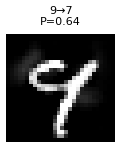


W związku, z powyższym dalszą analizę przeprowadzono na podstawie algorytmu z $\lambda = 10$.

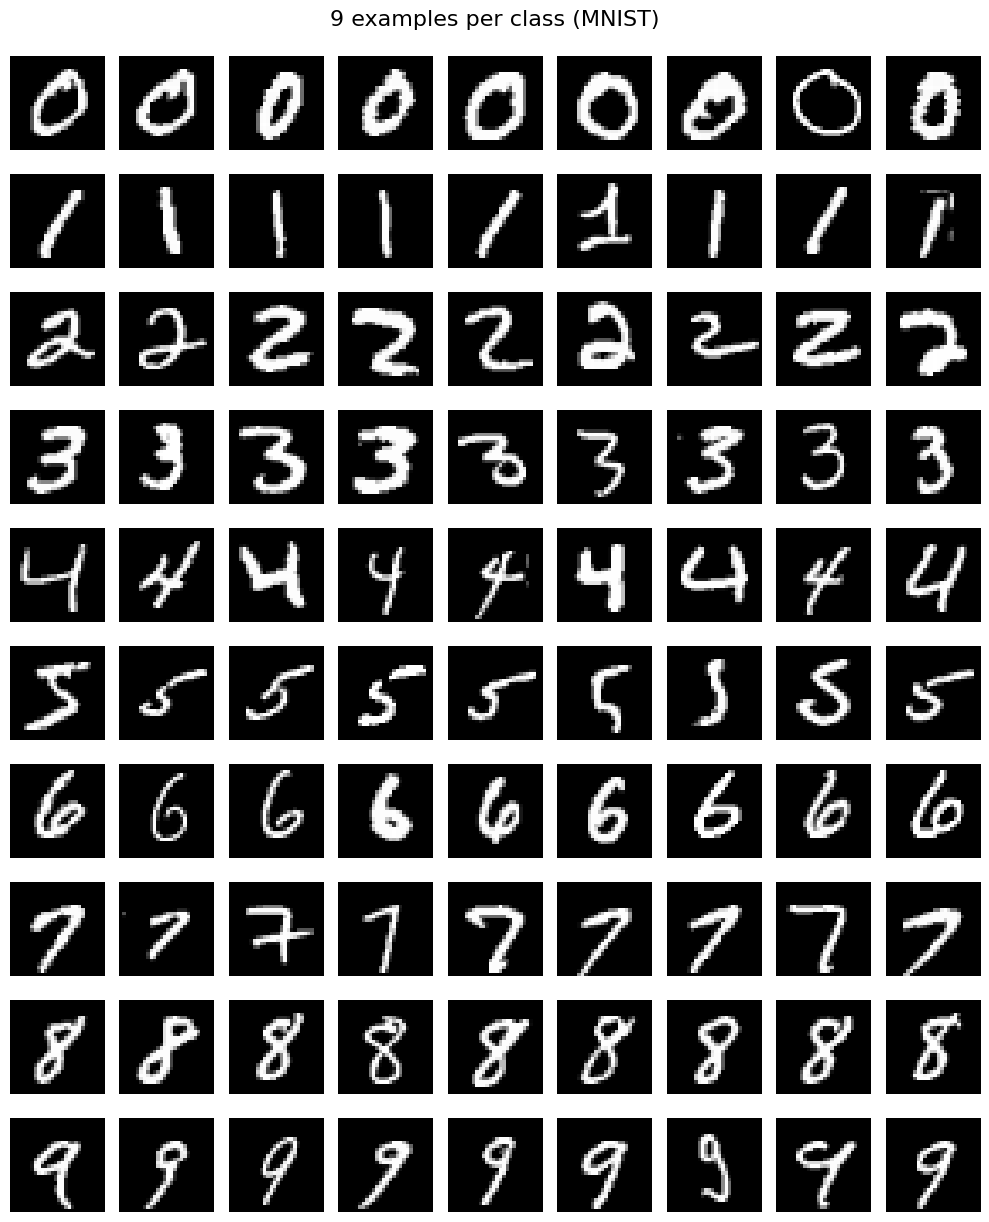

In [3]:
# code that plots original digits from MNIST

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# moving calculations to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_nine_per_class(device='cuda'):

    # preparing dataset
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    images = {i: [] for i in range(10)}

    # loop that collects 9 distinct images for every class
    for img, label in dataset:
        if len(images[label]) < 9:
            images[label].append(img)
        if all(len(v) == 9 for v in images.values()):
            break

    all_imgs, all_labels = [], []

    # gathers all images in one list (all_imgs) and all labels (all_labels)
    for label in range(10):
        all_imgs.extend(images[label])
        all_labels.extend([label] * 9)

    return torch.stack(all_imgs).to(device), torch.tensor(all_labels, device=device)

# defining function for plotting original digits
def plot_nine_per_class(images, labels):
    fig, axs = plt.subplots(10, 9, figsize=(10, 12))
    for i in range(10):
        for j in range(9):
            idx = i * 9 + j
            axs[i, j].imshow(images[idx].cpu().squeeze(), cmap='gray')
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_ylabel(f"Label {i}", fontsize=10)
    plt.tight_layout()
    plt.suptitle("9 examples per class (MNIST)", fontsize=16, y=1.02)
    plt.show()

images, labels = get_nine_per_class(device=device)
plot_nine_per_class(images, labels)